In [4]:
!pip install tensorflow --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 117.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorfl

In [5]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
import shutil
import random
from zipfile import ZipFile
from google.colab import files
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [6]:
!pip install -U gdown

In [7]:
!gdown --id 1zsy20lvgBpnm0_qSCTTCwmNx0dZp_EMu

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1zsy20lvgBpnm0_qSCTTCwmNx0dZp_EMu
From (redirected): https://drive.google.com/uc?id=1zsy20lvgBpnm0_qSCTTCwmNx0dZp_EMu&confirm=t&uuid=039c1cf9-b527-4c78-9c32-4aac2e100ed3
To: /content/archive.zip
100% 690M/690M [00:16<00:00, 41.3MB/s]


In [8]:
# List all files in the current directory
os.listdir()

['.config', 'archive.zip', 'sample_data']

In [9]:
# Step 2: Extract the dataset
import zipfile

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("PlantVillage")

print("Zip file extracted successfully!")

Zip file extracted successfully!


In [10]:
# Step 3: Define Dataset Path and List Classes
dataset_path = os.path.join('PlantVillage', 'plantvillage', 'PlantVillage')

# List all class folders (types of diseases + healthy)
classes = os.listdir(dataset_path)
print("Total Classes:", len(classes))
print("Classes Found:", classes)


Total Classes: 15
Classes Found: ['Tomato_Early_blight', 'Tomato__Target_Spot', 'Tomato_Leaf_Mold', 'Pepper__bell___Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Late_blight', 'Potato___healthy', 'Tomato_Septoria_leaf_spot', 'Tomato__Tomato_mosaic_virus', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Pepper__bell___healthy', 'Tomato_Bacterial_spot', 'Potato___Late_blight', 'Potato___Early_blight', 'Tomato_healthy']


**Exploratory Data Analysis (EDA)**

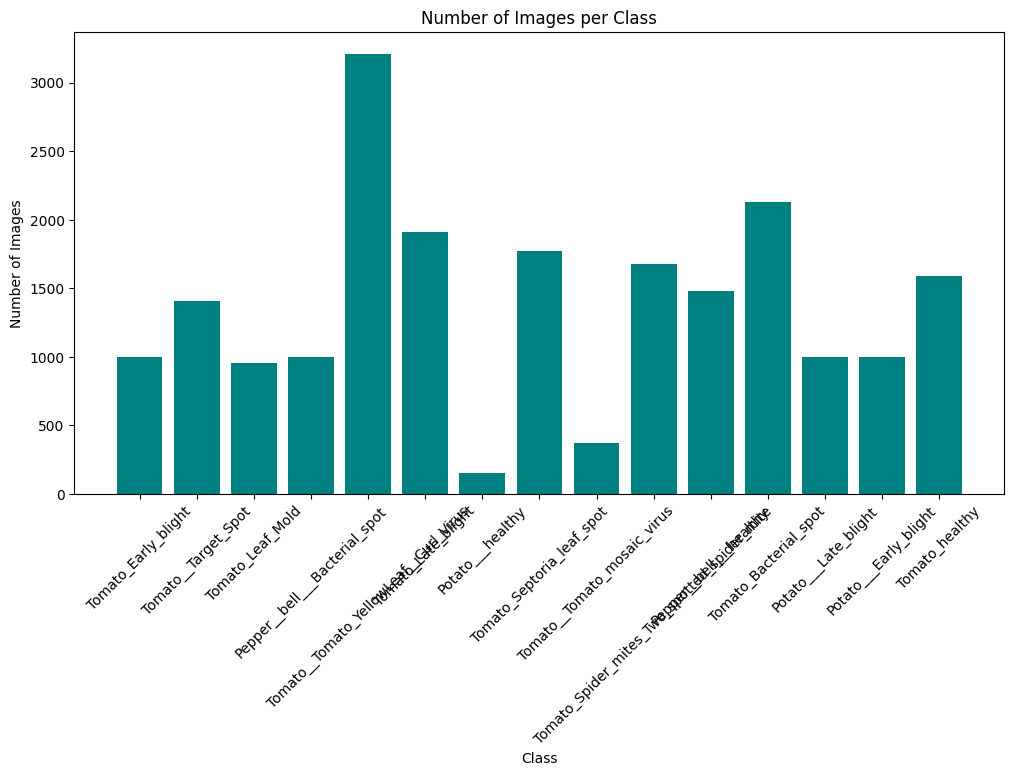

In [11]:
# Step 4: (Count Images per class)
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}

# Plot class distribution:
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='teal')
plt.xticks(rotation=45)
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

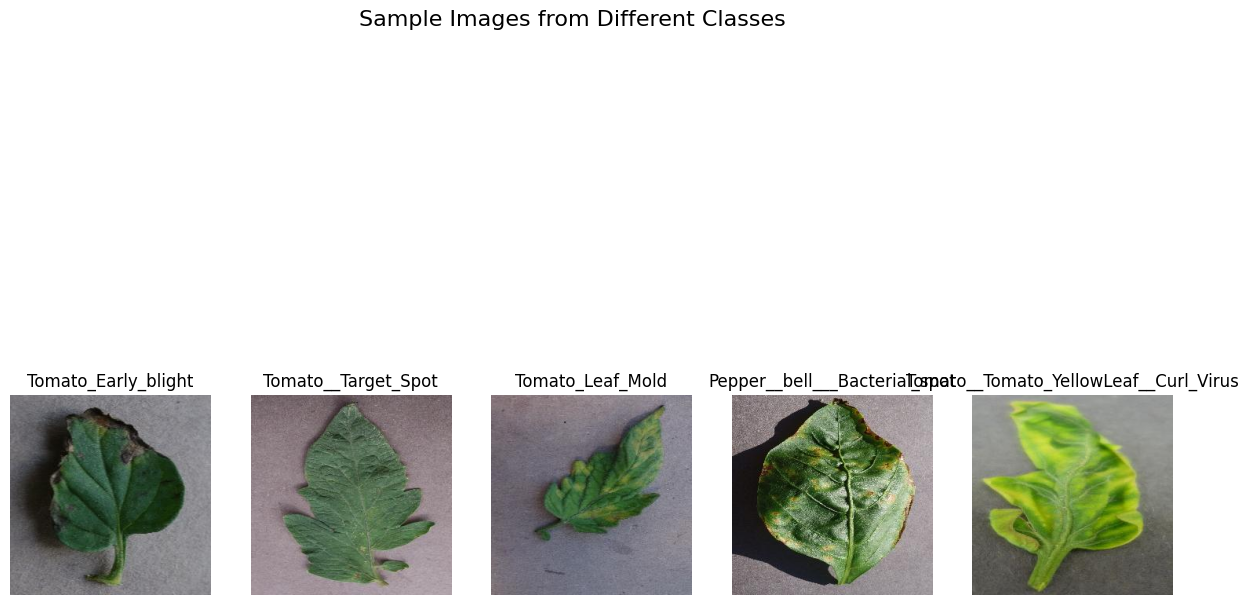

In [12]:
# (Show sample images from 1st 5 classes):

num_samples = 5  # Number of classes to display
plt.figure(figsize=(15, 10))
for i, cls in enumerate(classes[:num_samples]):  # Loop over first 5 classes
    folder_path = os.path.join(dataset_path, cls)  # dataset path
    sample_image = os.listdir(folder_path)[0]  # get first image in that class
    img = mpimg.imread(os.path.join(folder_path, sample_image))
    plt.subplot(1, num_samples, i+1)  # Create a subplot for each image
    plt.imshow(img)
    plt.title(cls)  # Set the class name as the title
    plt.axis('off')

plt.suptitle("Sample Images from Different Classes", fontsize=16)
plt.show()

**Create Train/Test Folders and Split Data (80/20)**

In [13]:
# Step 5: Create train/test folders
base_dir = os.path.join('PlantVillage', 'plantvillage', 'PlantVillage')
train_dir = 'data/train'
test_dir = 'data/test'

# Train and Test directories/folders
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop over all disease/healthy classes:
for cls in classes:
    os.makedirs(f'{train_dir}/{cls}', exist_ok=True) # Make sub-folder for each class in train
    os.makedirs(f'{test_dir}/{cls}', exist_ok=True)  # Make sub-folder for each class in test

    all_imgs = os.listdir(f'{dataset_path}/{cls}')  # List all images in current class
    random.shuffle(all_imgs) # Shuffle images for randomness

    # Split data: 80% for training, remaining 20% for testing
    split_idx = int(0.8 * len(all_imgs))
    train_imgs = all_imgs[:split_idx]
    test_imgs = all_imgs[split_idx:]

    # Copy files to train directory
    for img in train_imgs:
        shutil.copy(f'{base_dir}/{cls}/{img}', f'{train_dir}/{cls}/{img}')

    # Copy files to test directory
    for img in test_imgs:
        shutil.copy(f'{base_dir}/{cls}/{img}', f'{test_dir}/{cls}/{img}')

print("Dataset reorganized successfully!")

Dataset reorganized successfully!


**Define Image Size & Set Paths**

In [14]:
# Step 6:
IMAGE_SIZE = [224, 224]
train_path = 'data/train'
valid_path = 'data/test'

**Data Augmentation and Preprocessing**

In [15]:
# Step:7
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size=IMAGE_SIZE,
                                            batch_size=32,
                                            class_mode='categorical')


Found 16505 images belonging to 15 classes.
Found 4133 images belonging to 15 classes.


 **Build CNN Model**

In [16]:
# Step: 8
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten the data for the fully connected layer
model.add(Flatten())

# Fully connected layer with dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer (softmax activation for multi-class classification)
model.add(Dense(len(classes), activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile Model**

In [17]:
# Step 9:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,909,327 (91.21 MB)

 Trainable params: 23,909,327 (91.21 MB)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

In [18]:
# Step 10:
history = model.fit(training_set,
                    validation_data=test_set,
                    epochs=10,
                    steps_per_epoch=len(training_set),
                    validation_steps=len(test_set))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 219s 412ms/step - accuracy: 0.2967 - loss: 2.4164 - val_accuracy: 0.6963 - val_loss: 0.9415
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 267s 432ms/step - accuracy: 0.6206 - loss: 1.1700 - val_accuracy: 0.6842 - val_loss: 0.9386
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 241s 390ms/step - accuracy: 0.6965 - loss: 0.9062 - val_accuracy: 0.7951 - val_loss: 0.5952
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 203s 392ms/step - accuracy: 0.7301 - loss: 0.8159 - val_accuracy: 0.7888 - val_loss: 0.6487
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 204s 395ms/step - accuracy: 0.7614 - loss: 0.6990 - val_accuracy: 0.7975 - val_loss: 0.5903
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 259s 390ms/step - accuracy: 0.7687 - loss: 0.6702 - val_accuracy: 0.7762 - val_loss: 0.6895
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 201s 389ms/step - accuracy: 0.7938 - loss: 0.6104 - val_accuracy: 0.7847 - val_loss: 0.6805
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 204s 393ms/step - accuracy: 0.7999 -

**Evaluate the Model**

Accuracy Plot

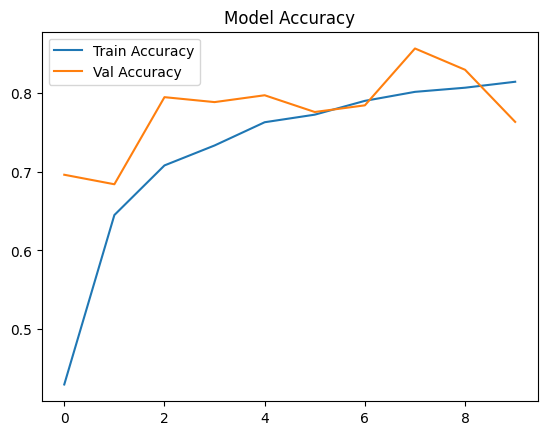

In [19]:
# Step 11:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

Epochs 0–2: Training accuracy rises quickly from 44%.
Epochs 3–6: Both training and validation accuracies improve steadily. Validation accuracy spikes at epoch 3 — a good sign. Small dip at epoch 4, likely due to data variation.
Epochs 7–9: Training accuracy keeps growing (reaches ~78%).

Validation accuracy peaks at epoch 8 (~85%), then drops slightly.

Loss Plot

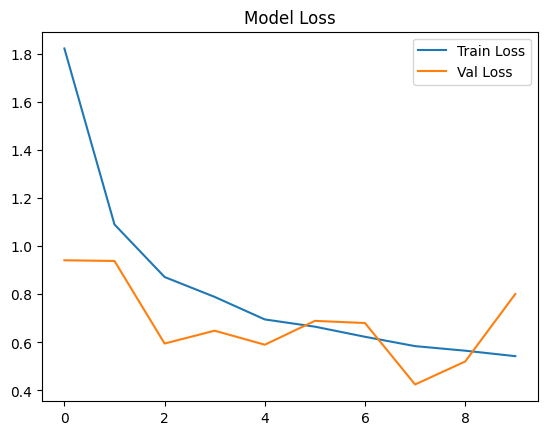

In [20]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

Epoch 0: High loss (Train ~1.85, Val ~1.2) it is normal at start.

Epochs 1–3: Loss drops fast, showing the model is learning well (Val loss ~0.52 at epoch 3).

Epochs 4–9: Train loss keeps falling; Val loss slightly fluctuates, lowest at epoch 8 (~0.53), then rises a bit.

**Confusion Matrix & Classification Report & Confusion Matrix**

In [22]:
# Step 12:
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)

print("Classification Report:")
print(classification_report(test_set.classes, y_pred, target_names=test_set.class_indices.keys()))

130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step
Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.06      0.07      0.07       200
                     Pepper__bell___healthy       0.11      0.09      0.10       296
                      Potato___Early_blight       0.08      0.10      0.09       200
                       Potato___Late_blight       0.02      0.01      0.01       200
                           Potato___healthy       0.00      0.00      0.00        31
                      Tomato_Bacterial_spot       0.11      0.12      0.11       426
                        Tomato_Early_blight       0.06      0.04      0.05       200
                         Tomato_Late_blight       0.08      0.06      0.07       382
                           Tomato_Leaf_Mold       0.06      0.07      0.07       191
                  Tomato_Septoria_leaf_spot       0.09      0.10      0.10       355

Accuracy is 9%	Only 9 out of 100 predictions are correct. Very low accuracy.
Macro Avg F1-score is	0.07 treating all classes equally, regardless of size which is very low.
Weighted Avg F1-score	is 0.09 by the number of samples per class.

130/130 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step


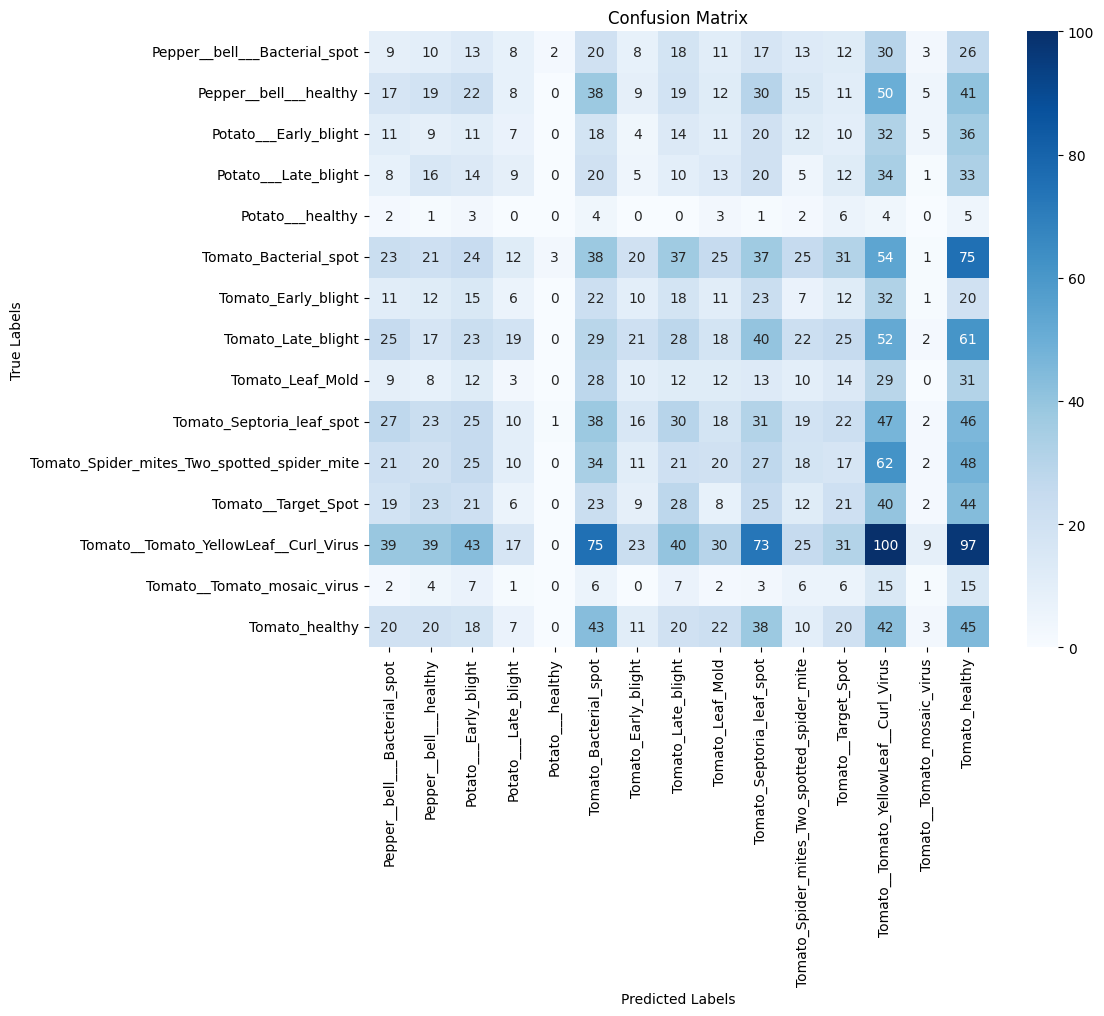

In [23]:
import seaborn as sns
# Predict the classes on the test set
y_pred_probs = model.predict(test_set)

# Convert the probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Get the true labels from the test_set
y_true = test_set.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices, yticklabels=test_set.class_indices)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Tomato__Tomato_YellowLeaf__Curl_Virus:
This class was identified correctly the most — predicted right 100 times by the model.
 But the issue is that the model also confuses this class with other similar diseases like Tomato_Target_Spot (73 times), Tomato_Bacterial_spot (75 times), and Tomato_healthy (97 times).
This means the model is confused by visual similarities — these diseases probably look alike in images.

Potato___healthy:
Only predicted correctly 5 times — this shows that the model often mistakes healthy leaves for diseased ones.
 It is confusing this class with other potato or tomato diseases.
This likely means either the images aren't very clear or the model didn't learn to distinguish between healthy and infected leaves properly.

Tomato__Tomato_mosaic_virus
Only 15 correct predictions — very low accuracy.
This class is often confused with Tomato_healthy, Tomato_Late_blight, and Tomato_Target_Spot.

**Prediction on New Image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Tomato_healthy


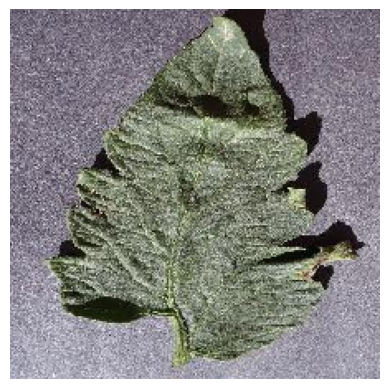

In [24]:
# STEP 13:

# Correct path to image folder
img_path = 'data/test/Tomato_healthy'

# Load and show the image
img = image.load_img(os.path.join(img_path, os.listdir(img_path)[0]), target_size=IMAGE_SIZE)
plt.imshow(img)
plt.axis('off')

# Preprocessing
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.

# Prediction
prediction = model.predict(img)
predicted_class = list(test_set.class_indices.keys())[np.argmax(prediction)]
print("Predicted Class:", predicted_class)